In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline
plt.style.use('ggplot')

reading the bike sharing data

In [2]:
dailyData = pd.read_csv('Bike-Sharing-Dataset/day.csv')
hourlyData = pd.read_csv('Bike-Sharing-Dataset/hour.csv')
dailyData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hourlyData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
"""Map the integer values to the repective days, months and seasons"""

weekdayMap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
mnthMap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
seasonMap = {1:'spring',2:'summer',3:'fall',4:'winter'}

dailyDF = deepcopy(dailyData)
hourlyDF = deepcopy(hourlyData)

for val, valMap in [('weekday',weekdayMap), ('mnth',mnthMap), ('season',seasonMap)]:
    
    dailyDF[val] = dailyDF[val].map(valMap)
    hourlyDF[val] = hourlyDF[val].map(valMap)

dailyDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,Jan,0,Sun,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Mon,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Tue,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Wed,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Thu,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
dailyDF.describe()

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###### Maximum riders on a single day

In [6]:
dailyDF['cnt'].max()

8714

###### No of riders on the coldest day 

In [7]:
dailyDF[dailyDF['temp'] == dailyDF['temp'].min()]['cnt']

21    981
Name: cnt, dtype: int64

###### No of riders on the windiest day

In [8]:
dailyDF[dailyDF['windspeed'] == dailyDF['windspeed'].max()]['cnt']

49    1635
Name: cnt, dtype: int64

Average daily bike users by season

In [9]:
dailyDF.groupby('season')['casual'].mean()

season
fall      1202.611702
spring     334.928177
summer    1106.097826
winter     729.112360
Name: casual, dtype: float64

Spring is the least preferred season for bike riding, this data being from the city of Porto, it could mean that 
it is rainy season, hence the low ridership.

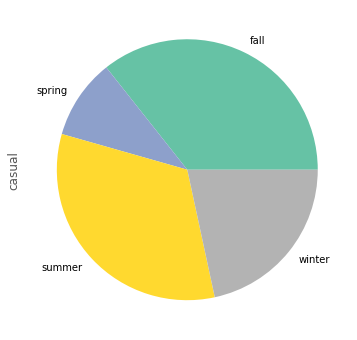

In [10]:
dailyDF.groupby('season')['casual'].mean().plot(kind='pie',cmap="Set2", figsize=(10,6))

Average registered daily riders by Month

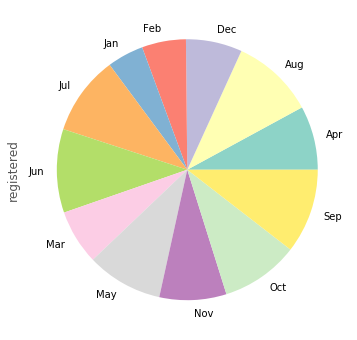

In [11]:
dailyDF.groupby('mnth')['registered'].mean().plot(kind='pie',cmap="Set3", figsize=(10,6))

### Casual riders Vs Temperature

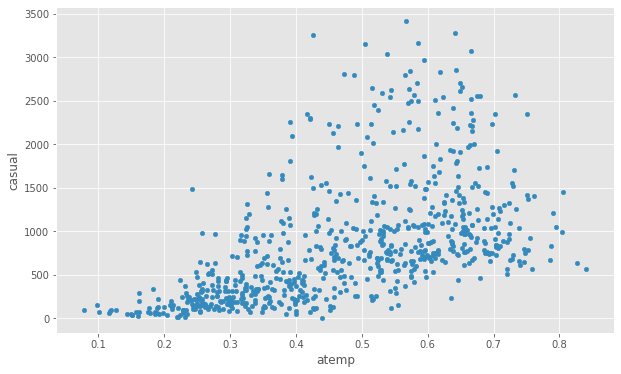

In [12]:
dailyData.plot.scatter(x='atemp',y='casual', figsize=(10,6))

###### Registered riders by the Hour

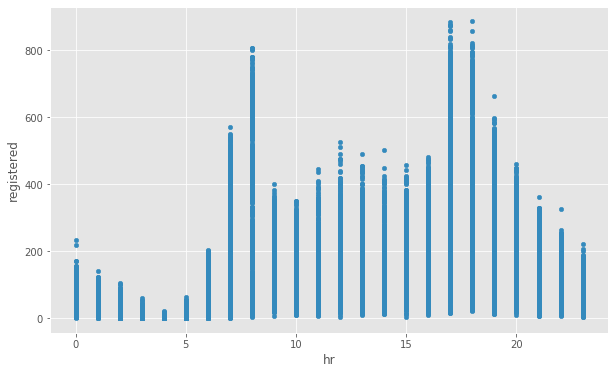

In [13]:
fig, ax = plt.subplots()
hourlyData.plot.scatter(y='registered',x='hr', figsize= (10,6), ax=ax)

###### casual riders Vs registered riders Vs Temperature

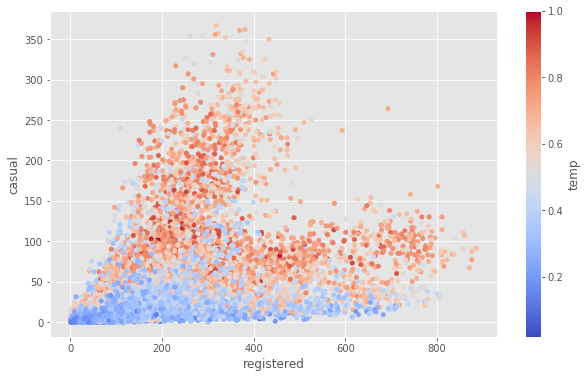

In [14]:
fig, ax = plt.subplots()
hourlyData.plot.scatter(x='registered',y='casual',c='temp',cmap='coolwarm', figsize= (10,6), ax=ax)

##### Analyzing the correlations to do an initial feature selection

In [15]:
corr = dailyData.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1,0.41,0.87,0.5,0.016,-1.6e-05,-0.0043,-0.021,0.15,0.15,0.016,-0.11,0.28,0.66,0.63
season,0.41,1,-0.0018,0.83,-0.011,-0.0031,0.012,0.019,0.33,0.34,0.21,-0.23,0.21,0.41,0.41
yr,0.87,-0.0018,1,-0.0018,0.008,-0.0055,-0.002,-0.049,0.048,0.046,-0.11,-0.012,0.25,0.59,0.57
mnth,0.5,0.83,-0.0018,1,0.019,0.0095,-0.0059,0.044,0.22,0.23,0.22,-0.21,0.12,0.29,0.28
holiday,0.016,-0.011,0.008,0.019,1,-0.1,-0.25,-0.035,-0.029,-0.033,-0.016,0.0063,0.054,-0.11,-0.068
weekday,-1.6e-05,-0.0031,-0.0055,0.0095,-0.1,1,0.036,0.031,-0.00017,-0.0075,-0.052,0.014,0.06,0.057,0.067
workingday,-0.0043,0.012,-0.002,-0.0059,-0.25,0.036,1,0.061,0.053,0.052,0.024,-0.019,-0.52,0.3,0.061
weathersit,-0.021,0.019,-0.049,0.044,-0.035,0.031,0.061,1,-0.12,-0.12,0.59,0.04,-0.25,-0.26,-0.3
temp,0.15,0.33,0.048,0.22,-0.029,-0.00017,0.053,-0.12,1,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.15,0.34,0.046,0.23,-0.033,-0.0075,0.052,-0.12,0.99,1,0.14,-0.18,0.54,0.54,0.63


###### Generating a linear model to to predict daily ridership based on seasonal and weather patterns

In [16]:
X = dailyData.loc[:,['season','holiday','weekday','weathersit','temp','hum']]
y = dailyData.loc[:,['cnt']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Generating mean score using cross validation

In [17]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=5))

0.4960160676682507

In [18]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test['cnt'].to_numpy(), 'Predicted': np.concatenate(y_pred)})
df1 = df.head(25)

###### Based on the graph it can be observed that there is significant discrepancy between the predicted and the actual Bike rental counts

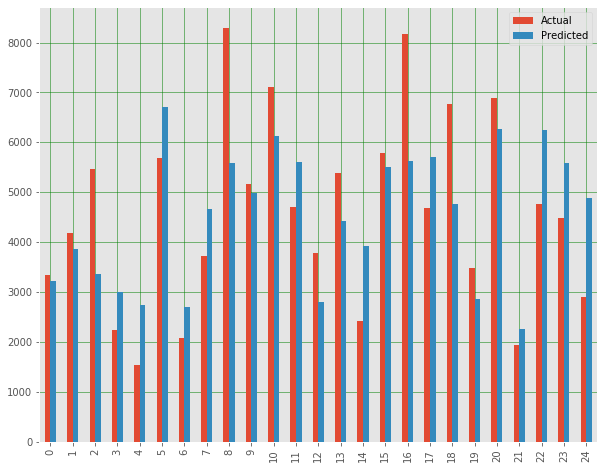

In [19]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

###### Because of the dynamic nature of the rentals the liner regression model doesn't do a good job of predicting the total rentals per day based on the weather and seasonal conditions

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1177.1046700408288
Mean Squared Error: 2024106.3084988869
Root Mean Squared Error: 1422.710901237102
